In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
# need pandas only to print out the TF-IDF matrix
import pandas as pd
# need "punkt" later on for stemming
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RyanMcKiernan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Example corpus
corpus = [
    'Welcome to data analytics!',
    'Data analytics study data.',
    'Data Mining finds patterns from data.',
    'Text Mining finds patterns from text.'
]

In [5]:
#Word Preprocessing
vectorizer = TfidfVectorizer(
    lowercase = True, 
    tokenizer = None,  # by default, it does word tokenization AND punctuation removal. You can replace it with a function that does other types of tokenziation
    stop_words = 'english',  # remove common English stopwords (it has a dictionary in the backend)
    ngram_range = (1,2),  # extract 1-gram (single tokens) and 2-gram (phrases of 2 words)
    use_idf = True  # means that we want to get the TF-IDF, rather than just TF
)

tfidf = vectorizer.fit_transform(corpus)

df = pd.DataFrame(tfidf.todense(), columns = vectorizer.get_feature_names_out())
df

,analytics,analytics study,data,data analytics,data mining,finds,finds patterns,mining,mining finds,patterns,patterns data,patterns text,study,study data,text,text mining,welcome,welcome data
0,0.412640,0.000000,0.334067,0.412640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.523381,0.523381
1,0.325334,0.412645,0.526772,0.325334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.412645,0.412645,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.491805,0.000000,0.385254,0.303739,0.303739,0.303739,0.303739,0.303739,0.385254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.261242,0.261242,0.261242,0.261242,0.261242,0.000000,0.331352,0.000000,0.000000,0.662704,0.331352,0.000000,0.000000


In [7]:
ps = PorterStemmer()
corpus_stemmed = []
for doc in corpus:
    # stemmer only works on words, so we have to tokenize first in nltk...
    words = word_tokenize(doc)
    doc_stemmed = ''
    for w in words:
        w_stemmed = ps.stem(w)
        doc_stemmed += ' ' + w_stemmed
    corpus_stemmed.append(doc_stemmed)
print(corpus_stemmed)

[' welcom to data analyt !', ' data analyt studi data .', ' data mine find pattern from data .', ' text mine find pattern from text .']


In [9]:
posts = []
for line in open("FB_posts_labeled.txt"):
    if 'postId' not in line:
        pid, message, Appreciation, Complaint, Feedback = line.rstrip('\n').split('\t')
        posts.append(message)
print(len(posts))

7961


In [11]:
unlabel_posts = []
for line in open("FB_posts_unlabeled.txt"):
    if 'postId' not in line:
        pid, message = line.rstrip('\n').split('\t')
        unlabel_posts.append(message)
print(len(unlabel_posts))

2039


In [13]:
#Word Embeddings
import nltk
import string
nltk.download('stopwords')
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RyanMcKiernan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:

texts = []
for line in open("FB_posts_labeled.txt"):
    if 'postId' not in line:
        text = line.rstrip('\n').split('\t')[1]
        processed_text = []
        # Lowercasing
        text = text.lower()
        # Tokenization with NLTK
        tokens = nltk.tokenize.word_tokenize(text)
        # Remove stop words and punctuations with NLTK
        for token in tokens:
            if token not in nltk.corpus.stopwords.words('english') and token not in string.punctuation:
                processed_text.append(token)
        # put processed text back into a list (remove the cases where nothing left after pre-processing)
        if len(processed_text) > 0:
            texts.append(processed_text)

In [17]:
#checking the results
print(len(texts))
print(texts[0:10])

7961
[['great'], ['yum', 'yum'], ['yummm'], ['sweet'], ['nice'], ['nice'], ['winner'], ['awesome'], ['yay'], ['gmo']]


In [21]:
model = Word2Vec(sentences = texts,  # input should be a list of lists of tokens, like our output from preprocessing
                 vector_size = 128,  # dimension of embedding (this parameter may be named size if you are using an older version of Gensim)
                 window = 2,  # size of context window
                 min_count = 1,  # remove very infrequent words
                 sg = 1,  # skip-gram, set to 0 if you want CBOW
                 workers = 4)  # parallel training

In [23]:
#Examining a word embedding
vector = model.wv['southwest']
print(vector)

[ 0.29406208 -0.15398899  0.5048778   0.26679188  0.08661762 -0.5352929
  0.16069171 -0.04652365  0.35723886 -0.2882844   0.42487916 -0.12414876
 -0.01366068  0.13792697 -0.15047449  0.48069316 -0.00559791 -0.2990473
 -0.01128771  0.7103821   0.01386431  0.55207527  0.00667181 -0.33833882
 -0.11239548  0.25875258  0.39468184 -0.2363507  -0.49917343  0.44357818
 -0.0126387   0.01079292  0.19089256  0.07965142 -0.20257004  0.22474682
  0.1544976   0.09935872  0.25020427 -0.5916332  -0.06239434 -0.19179937
  0.19980378  0.03657932  0.1514583   0.16409305 -0.22749051  0.01266791
 -0.03467363 -0.21550727 -0.1360241  -0.1764573   0.36468711 -0.21531178
  0.21120691 -0.13833264  0.11987369  0.1274983  -0.25077945 -0.5985862
  0.04538506  0.04453259 -0.00899884  0.04343507 -0.01401553 -0.06677917
 -0.30316672  0.10488717 -0.13583796  0.28724748  0.45879602 -0.36942214
 -0.5403268   0.22081414  0.23622636  0.10436755  0.2891542  -0.29864752
 -0.1815837  -0.1496407  -0.7410093  -0.31934243 -0.14

In [25]:
#Quantify the similarity between words
print(model.wv.similarity('happy', 'great'))

0.89912367


In [27]:
#Most similar words
model.wv.most_similar(positive = ['southwest'], topn=10)

[('delta', 0.9790472388267517),
 ('united', 0.9744508862495422),
 ('american', 0.9702067375183105),
 ('flying', 0.9545647501945496),
 ('airline', 0.9311707615852356),
 ('airlines', 0.9304344654083252),
 ('fly', 0.9090550541877747),
 ('disappointed', 0.9084447622299194),
 ('flown', 0.90635746717453),
 ('aa', 0.8982601165771484)]

In [29]:
#Visualizing word embeddings on a model
all_embeddings = model.wv[model.wv.index_to_key]
print(all_embeddings)

coordinates = TSNE(n_components = 2).fit_transform(all_embeddings)
print(coordinates)

[[ 2.1666692e-01 -1.3166517e-02  4.5161787e-01 ... -4.1739947e-01
   2.2115880e-01  1.9212915e-01]
 [ 2.1226051e-01  2.3914285e-02  6.7929226e-01 ... -5.5739260e-01
   3.8742203e-01  1.2326052e-01]
 [ 6.1496630e-02 -3.7225762e-01  8.9405023e-02 ...  2.8461671e-01
   2.5613338e-01  1.8615782e-01]
 ...
 [ 1.6375201e-02 -9.5885517e-03  2.5805393e-02 ... -2.8244952e-02
   3.0017169e-02 -4.0378221e-03]
 [ 1.8398009e-02 -4.1980632e-03  2.6084449e-02 ... -2.9664330e-02
   4.2648830e-02 -2.0193880e-04]
 [ 1.5103852e-02 -3.8634127e-03  3.2654878e-02 ... -2.7119115e-02
   2.4374532e-02 -5.8738836e-03]]
[[ 34.99473   -49.123924 ]
 [ 34.114677  -49.880898 ]
 [ 40.399036  -52.50154  ]
 ...
 [  2.0505419  -9.823557 ]
 [ -4.5832844  33.186092 ]
 [-10.898364  -25.421299 ]]


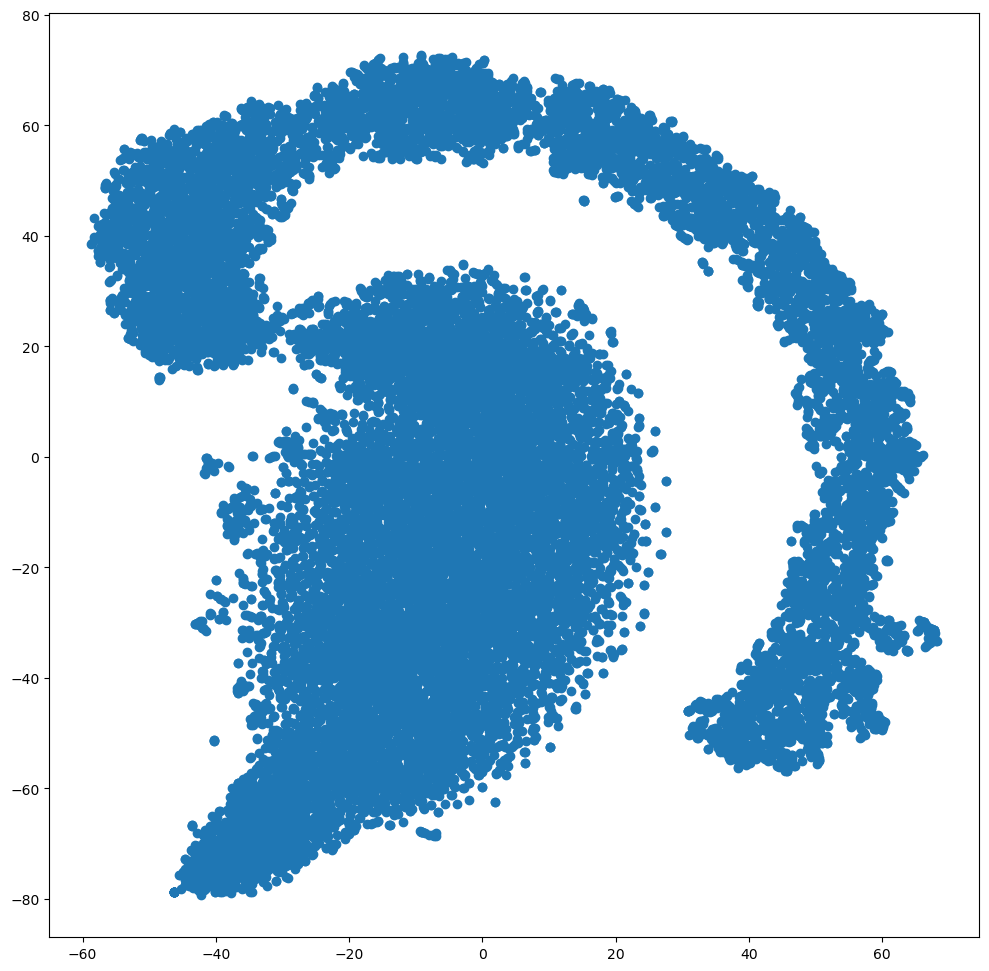

In [31]:
plt.figure(figsize=(12, 12))
plt.scatter(coordinates[:, 0], coordinates[:, 1])
plt.show()

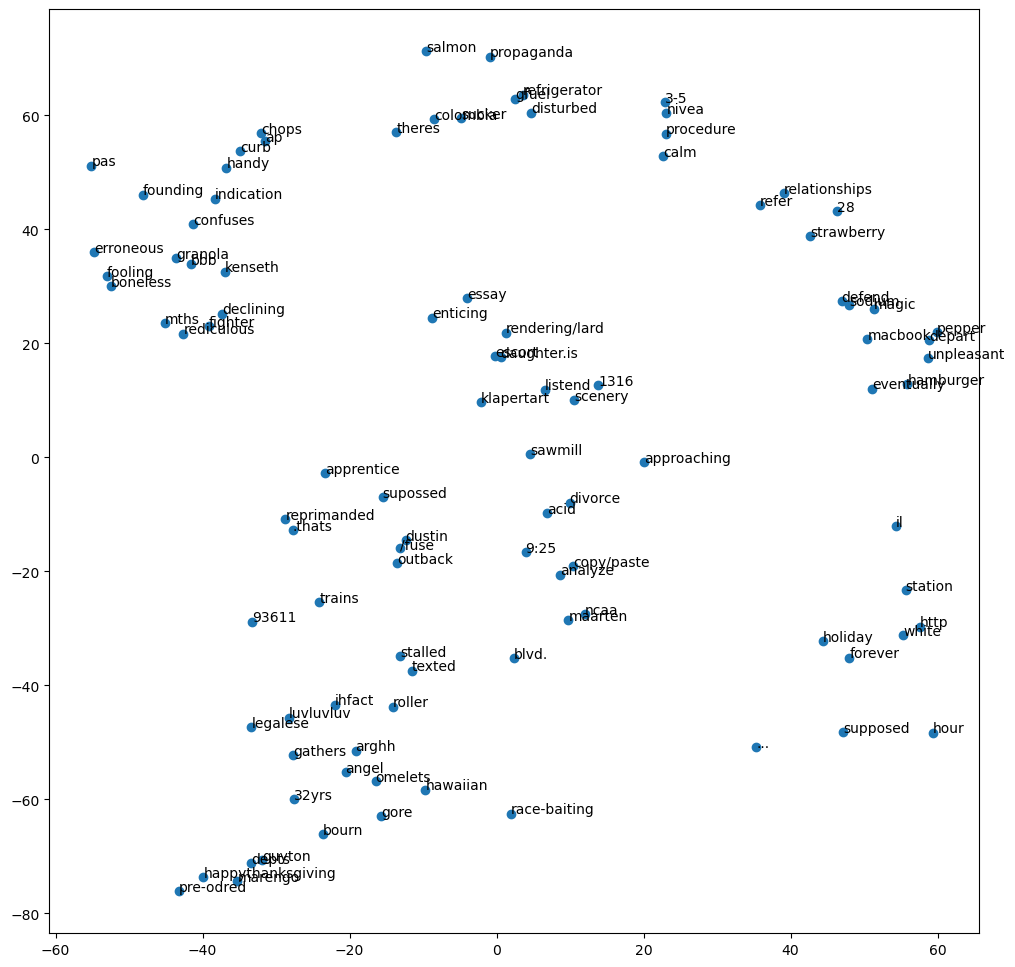

In [33]:
#plotting a random sample of words
sample = np.random.randint(coordinates.shape[0], size = 100)
plt.figure(figsize=(12, 12))
plt.scatter(coordinates[sample, 0], coordinates[sample, 1])

# add lables
words = list(model.wv.index_to_key)
for i in sample:
    plt.annotate(words[i], xy=(coordinates[i, 0], coordinates[i, 1]))
    
plt.show()